# OPI ANALYTICS: Examen Ciencia de Datos L3/L4

## SECCIÓN A

### Solicitante: Darío Díaz Cuevas

### Fecha de entrega: 08/08/2021

In [691]:
#importacion de librerias

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Datos Abiertos de la CDMX

La Agencia Digital de Innovación Pública tiene disponibles datos de las carpetas de investigación aportados por la PGJ. La tabla está disponible aquí: https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/resource/48fcb848-220c-4af0-839b-4fd8ac812c0f

Utilizando estos datos, responde las siguientes preguntas:

**1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas, sólo describe la prueba y lo que te dice cada una.**

El primer paso es asegurarse se que tienen los datos correctos: Al momento de consultar la liga a los datos, se identificó que la información corresponde a las carpetas de investigación de la Fiscalía General de Justicia (FGJ). Por otro lado, en las indicaciones se indica consultar las carpetas aportadas por la Procuradoría General de Justicia (PGJ), localizada en esta liga: https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-pgj-cdmx. 

Al revisar y comparar ambos conjuntos de datos, se encontró que ambas tablas son similares. Los campos en la tabla de datos correspondientes a la PGJ se encuentran presentes en la tabla de datos de la FJG. Similarmente, esta última tabla posee un mayor número de observaciones y contiene información más actualizada. Contiene registros para el año 2020, mientras que la tabla de datos de la PGJ posee información hasta 2019. Debido a esto y a la actual transición PGJ --> FGJ, se utiliza la tabla obtenida de la liga original.

Antes de comenzar a investigar cualquier tipo de interrogante sobre los datos, es conveniente echarles un vistazo para conocer su estructura. Para esto, se comienza por leer los datos y desplegar una porción de ellos, así como un resumen sobre los tipos de datos.

In [530]:
#lectura del dataset de carpetas de investigacion
carp_inv = pd.read_csv('carpetas_completa_junio_2021.csv')

In [531]:
#visualizacion de la tabla
carp_inv

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248919,2021.0,Junio,2021-06-29 17:00:00,2021,Junio,2021-06-30 23:32:31,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MILPA...,MIL-2,UI-3SD,DELITO DE BAJO IMPACTO,OAXTEPEC,NaN,SAN MARCOS (SANTA ANA TLACOTENCO),MILPA ALTA,FUERO COMUN,-98.992460,19.168371,NaN
1248920,2021.0,Junio,2021-06-04 19:00:00,2021,Junio,2021-06-30 23:36:45,ROBO DE ACCESORIOS DE AUTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-7,UI-3SD,DELITO DE BAJO IMPACTO,AVENIDA MEXICO,TEOTIHUACAN,HIPÓDROMO,CUAUHTEMOC,FUERO COMUN,-99.168311,19.412001,NaN
1248921,2021.0,Junio,2021-06-30 19:40:00,2021,Junio,2021-06-30 23:37:12,AMENAZAS,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAC...,IZC-2,UI-3SD,DELITO DE BAJO IMPACTO,CUATRO,NaN,AGRÍCOLA PANTITLAN,IZTACALCO,FUERO COMUN,-99.061716,19.419028,NaN
1248922,2021.0,Mayo,2021-05-16 21:08:00,2021,Junio,2021-06-30 23:45:57,DAÑO EN PROPIEDAD AJENA INTENCIONAL,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-7,UI-3SD,DELITO DE BAJO IMPACTO,ALVARO OBREGON,NaN,ROMA NORTE,CUAUHTEMOC,FUERO COMUN,-99.158994,19.418615,NaN


A continuación se muestra el tamaño y tipo de datos en la tabla:

In [532]:
print(f"La tabla contiene {carp_inv.shape[0]:,} observaciones y {carp_inv.shape[1]:,} columnas.")

La tabla contiene 1,248,924 observaciones y 19 columnas.


In [533]:
#tipos de datos
carp_inv.dtypes

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

Para asegurar la calidad de los datos, es necesario inspeccionar varios aspectos. 

Para comenzar, es importante identificar valores faltantes, sobre todo para el caso de variables necesarias para el análisis. En caso de haber valores faltantes, se debe determinar si su presencia es o no relevante, o admisible. Por ejemplo, en este dataset existe una columna llamada `tempo` cuyo valor único es `NaN`. Esta columna podría ser descartada ya que no aporta información alguna. Cuando se tienen valores faltantes en variables necesarias para uno o más análisis, debe definirse cómo proceder: Si la mayoría de observaciones en una o más variables es faltante, en ocasiones se deja fuera del análisis a dichas variables. En caso de que sólo una pequeña porción de los records de la tabla contenga valores faltantes, estos pueden omitirse en muchos casos. Cuando la omisión de observaciones con valores faltantes no es una opción y estos ocurren en un patrón aleatorio y en una cantidad moderada, puede recurrirse a la imputación. Existen diversos métodos que van desde imputación usando medidas de tendencia central, hasta predicción por interpolación o algoritmos de aprendizaje supervisado.

También es necesario revisar el tipo de datos, y formatos para fechas. Por ejemplo, en esta tabla de datos, el año de ocurrencia de los delitos está representado por un número flotante (2016.0, 2017.0, etc), mientras que el año de inicio de la investigación es entero (2016, 2017, etc.).

Otro chequeo que puede considerarse se relaciona con la unicidad de las observaciones. Dependiendo de los datos puede ser necesario verificar que no existan renglones duplicados. En todo caso, es conveniente tener o definir un campo o índice que permita identificar de manera única cada observación en la tabla.

Adicionalmente se debe revisar que los campos no contengan inconsistencias o valores inadmisibles que generalmente son el producto de errores de captura o procesamiento, como por ejemplo, años negativos, fechas o rangos de fechas sin sentido u orden temporal, tipos de datos mezclados (ejemplo: representar los meses con números del 1 al 12, y encontrar observaciones en donde se representan con texto), etc. La detección de anomalías no es lo mismo que la detección de outliers, y el proceso para determinar cuáles observaciones son producto de un error y cuales surgen simplemente a partir de la variabilidad de los datos, es rara vez claro. En mi opinión, eliminar observaciones atípicas durante el limpiado de datos no es lo más recomendabe, a menos que no exista duda alguna de que se trata de errores.

Finalmente, el proceso de limpieza y análisis de los datos no es lineal. Existen ocasiones en que primero se realizan pruebas para tener datos de calidad, y una vez que se está realizando el análisis y se va conociendo mejor la estructura de los datos, se identifican nuevos problemas o situaciones que requieren de nuevas pruebas de calidad y data cleaning.

**2. Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos con pocas ocurrencias).**

Los distintos registros de delitos contenidos en la tabla ocurren en distintas zonas del país. Si bien no existe un campo que indique la ciudad en la cual ocurrió el delito, el campo `alcaldia_hechos` permite identificar si éste ocurrió en la CDMX. Debido a que la ocurrencia de delitos en CDMX es abundante en la tabla, es posible obtener las 16 alcaldías de la CDMX como las primeras 16 observaciones del vector de alcaldías únicas. 

In [534]:
#revision de alcaldias en la tabla mediante arreglo de valores únicos
carp_inv.alcaldia_hechos.unique()

array(['BENITO JUAREZ', 'IZTAPALAPA', 'CUAUHTEMOC', 'TLAHUAC',
       'IZTACALCO', 'GUSTAVO A MADERO', 'MIGUEL HIDALGO', 'TLALPAN',
       'ALVARO OBREGON', 'VENUSTIANO CARRANZA', 'AZCAPOTZALCO',
       'CUAJIMALPA DE MORELOS', 'COYOACAN', 'XOCHIMILCO',
       'LA MAGDALENA CONTRERAS', 'MILPA ALTA', 'TLALNEPANTLA DE BAZ',
       'VERACRUZ', 'IXCATEOPAN DE CUAUHTEMOC', 'TUXPAM', 'HUIXQUILUCAN',
       'OCOYOACAC', 'ECATEPEC DE MORELOS', nan, 'SIN DATO', 'TULTEPEC',
       'ACATZINGO', 'GUELATAO DE JUAREZ', 'HERMOSILLO', 'ENSENADA',
       'IXTAPALUCA', 'NAUCALPAN DE JUAREZ', 'NEZAHUALCOYOTL', 'CHALCO',
       'TLATLAYA', 'SAN JUAN GUICHICOVI', 'ZAPOPAN',
       'SAN PEDRO IXTLAHUACA', 'NICOLAS ROMERO', 'VICTORIA', 'CULIACAN',
       'VALLE DE CHALCO SOLIDARIDAD', 'TIANGUISTENCO', 'TEHUACAN',
       'ACAPULCO DE JUAREZ', 'TEMASCALCINGO', 'CUAUTITLAN IZCALLI',
       'TIJUANA', 'CUERNAVACA', 'TENANGO DEL VALLE',
       'TULANCINGO DE BRAVO', 'CORREGIDORA', 'JUAREZ HIDALGO', 'CELAYA',
    

In [535]:
#arreglo con alcaldias de la CDMX
alc_cdmx = carp_inv.alcaldia_hechos.unique()[:16]

Un vistazo al arreglo anterior de alcaldías únicas revela la existencia de valores faltantes representados tanto por `nan` como el valor `SIN DATO`. Habría que ver si ambos formatos para representar missing values simbolizan lo mismo, o si representan casos diferentes. También pueden apreciarse pocas alcaldías con irregularidades, tales como uso de minúsculas o nombres distorsionados producto del intento de usar acentos. En el caso del análisis que debe llevarse a cabo para esta prueba técnica no es vital investigar estas situaciones, pero es una buena práctica identificar y señalar las inconsistencias e irregularidades que van siendo encontradas.

A continuación, se crea un nuevo data frame únicamente con los delitos cometidos en alcaldías de la CDMX, y se transforma el año de ocurrencia del delito de `float` a `int`. Como este campo tiene valores faltantes, el valor del año se representará como 0 en dichos casos.

In [708]:
#filtrado y creacion de tabla de delitos en cdmx
del_cdmx = carp_inv[carp_inv.alcaldia_hechos.isin(alc_cdmx)]
del_cdmx.reset_index(drop=True,inplace=True)

In [709]:
#chequeo de valores unicos de años de ocurrencia de delitos
del_cdmx.ao_hechos.unique()

array([2016., 2015., 2012., 2014., 2011., 2008., 2006., 2010., 2013.,
       2005., 2009.,   nan, 1955., 2004., 2002., 1998., 1997., 1965.,
       2007., 1987., 1999., 1956., 2001., 1996., 1986., 1915., 1988.,
       2000., 2017., 2003., 1991., 1993., 1977., 1984., 1995., 1994.,
       1990., 1992., 1978., 1989., 1972., 2018., 2019., 1974., 1970.,
       1980., 1976., 1983., 1985., 1966., 1969., 1981., 1960., 1982.,
       1975., 1954., 1973., 1964., 1968., 1963., 1971., 1958., 1942.,
       1930., 1979., 1906., 1962., 1957., 2020., 1950., 1952., 2021.,
       1967.])

In [710]:
#transformacion a int
del_cdmx.loc[:,'ao_hechos'] = del_cdmx.ao_hechos.fillna(0).astype(int)

Comparando las dimensiones de la tabla general de delitos y la de delitos en CDMX, es posible notar que la gran mayoría de los delitos ocurrieron o fueron registrados en la CDMX.

Para seguir con el análisis, se crean nuevas variables para representar numéricamente el mes de ocurrencia del delito, y la fecha como tipo `date`. Aquellas observaciones con mes faltante se representan por el valor 0.

In [711]:
#creacion de variable numerica para el mes de ocurrencia del delito
#missing values se representan momentaneamente como el string 'na'
del_cdmx.insert(2,'mes_hechos_num',del_cdmx.mes_hechos.fillna('na') ) 

In [712]:
#diccionario de meses y los numeros equivalentes, 'na' se representa por cero
meses = ["na","Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
d = dict(zip(meses,list(np.arange(13))))

#mapeo de mes a numero
del_cdmx.loc[:,'mes_hechos_num'] = del_cdmx.mes_hechos_num.apply(lambda mes: d[mes]).astype(int)

In [713]:
#variable con fecha de delito en tipo date
del_cdmx.insert(4,'fecha_hechos_dt',pd.to_datetime( del_cdmx.fecha_hechos).dt.date)

Una vez insertadas las nuevas variables, ta tabla queda con la siguiente estructura:

In [714]:
del_cdmx

,ao_hechos,mes_hechos,mes_hechos_num,fecha_hechos,fecha_hechos_dt,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,...,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016,Enero,1,2016-01-31 22:16:00,2016-01-31,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,...,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016,Enero,1,2016-01-31 20:50:00,2016-01-31,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,...,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016,Febrero,2,2016-02-01 00:30:00,2016-02-01,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",...,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016,Enero,1,2016-01-31 22:00:00,2016-01-31,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,...,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015,Diciembre,12,2015-12-25 12:00:00,2015-12-25,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,...,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235880,2021,Junio,6,2021-06-29 17:00:00,2021-06-29,2021,Junio,2021-06-30 23:32:31,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MILPA...,...,UI-3SD,DELITO DE BAJO IMPACTO,OAXTEPEC,NaN,SAN MARCOS (SANTA ANA TLACOTENCO),MILPA ALTA,FUERO COMUN,-98.992460,19.168371,NaN
1235881,2021,Junio,6,2021-06-04 19:00:00,2021-06-04,2021,Junio,2021-06-30 23:36:45,ROBO DE ACCESORIOS DE AUTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,...,UI-3SD,DELITO DE BAJO IMPACTO,AVENIDA MEXICO,TEOTIHUACAN,HIPÓDROMO,CUAUHTEMOC,FUERO COMUN,-99.168311,19.412001,NaN
1235882,2021,Junio,6,2021-06-30 19:40:00,2021-06-30,2021,Junio,2021-06-30 23:37:12,AMENAZAS,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAC...,...,UI-3SD,DELITO DE BAJO IMPACTO,CUATRO,NaN,AGRÍCOLA PANTITLAN,IZTACALCO,FUERO COMUN,-99.061716,19.419028,NaN
1235883,2021,Mayo,5,2021-05-16 21:08:00,2021-05-16,2021,Junio,2021-06-30 23:45:57,DAÑO EN PROPIEDAD AJENA INTENCIONAL,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,...,UI-3SD,DELITO DE BAJO IMPACTO,ALVARO OBREGON,NaN,ROMA NORTE,CUAUHTEMOC,FUERO COMUN,-99.158994,19.418615,NaN


In [715]:
print(f"La tabla contiene {del_cdmx.shape[0]:,} observaciones y {del_cdmx.shape[1]:,} columnas.")

La tabla contiene 1,235,885 observaciones y 21 columnas.


Una vez lista la tabla para los delitos en la CDMX, procedemos a ver el número de delitos por año, notando que existen 421 valores con cero, utilizado para representar delitos cometidos en años con valor faltante. Para fines de los ejercicios contenidos en esta prueba y considerando el número tan grande de observaciones en el data set, se decide omitir dichas observaciones por completo.

In [716]:
#conteo de delitos por año
pd.DataFrame(del_cdmx['ao_hechos'].value_counts().sort_index()).rename(columns={'ao_hechos':'delitos'}).transpose()

,0,1906,1915,1930,1942,1950,1952,1954,1955,1956,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
delitos,421,1,2,1,1,2,1,1,3,2,...,1477,2087,4139,15582,192999,224650,251358,240970,198077,99443


In [717]:
#eliminar observaciones correspondientes a año de hechos faltante
del_cdmx = del_cdmx[del_cdmx.ao_hechos > 0]

A partir del conteo anterior es posible observar que existen delitos cometidos en años lejanos en el pasado. Sin embargo, son muy pocos. La gran mayoría parecen estar concentrados en los últimos seis o siete años, como lo revela el resumen a continuación y el percentil 3 de la distribución de años, cuyo valor es 2016.

In [718]:
#resumen de la distribución de años en que se cometieron delitos
#media y la desviación estándar redondeados al entero más cercano
round(del_cdmx.ao_hechos.describe(),0).astype(int)

count    1235464
mean        2018
std            2
min         1906
25%         2017
50%         2018
75%         2019
max         2021
Name: ao_hechos, dtype: int32

In [719]:
#percentil 3 %
int(np.quantile(a=del_cdmx.ao_hechos,q=0.03))

2016

El cambio tan dramático que se observa en el número de delitos al pasar del año 2015 al 2016 seguramente no se debe a que haya incrementado repentinamente y en un orden de magnitud la ocurrencia de delitos, sino al registro de ellos. Debido a esto, se considerarán para el resto del análisis únicamente delitos ocurridos del año 2016 hasta la fecha actual.

In [720]:
#filtrado de delitos cuyo año de ocurrencia es menor a 2016
del_cdmx = del_cdmx[del_cdmx.ao_hechos>=2016]

#indice se reinicia
del_cdmx.reset_index(drop=True,inplace=True)

In [721]:
print(f"La tabla contiene {del_cdmx.shape[0]:,} observaciones y {del_cdmx.shape[1]:,} columnas.")

La tabla contiene 1,207,497 observaciones y 21 columnas.


Una vez hecho esto, se procede a visualizar el número de delitos diarios ocurridos en la CDMX desde el comienzo del año 2016, en forma de serie de tiempo. La tabla contiene registros de delitos ocurridos hasta junio 30 de 2021.

In [727]:
#rango de fechas resultante
print(f"La tabla contiene resgistros desde {min(del_cdmx.fecha_hechos_dt)} hasta {max(del_cdmx.fecha_hechos_dt)}.")

La tabla contiene resgistros desde 2016-01-01 hasta 2021-06-30.


In [728]:
#para evitar tener que cambiar el nombre de las columnas en los agregados, se añade una columna dummy
#esta tiene el nombre 'delitos' y su proposito es que los agregados adquieran este nombre en automatico
del_cdmx.insert(0,'delitos', 1 )

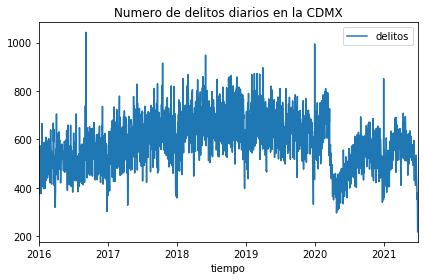

In [910]:
#conteo de delitos por dia desde 2016 y grafico de serie de tiempo
del_cdmx[['fecha_hechos_dt','delitos']].groupby('fecha_hechos_dt').count().plot()
plt.xlabel("tiempo")
plt.title("Numero de delitos diarios en la CDMX")
plt.tight_layout()
plt.show()

La gráfica anterior muestra un cambio radical en el comportamiento de la serie de tiempo (punto de cambio) a comienzos del año 2020. Esto coincide con el tiempo de llegada de la pandemia de Covid-19 al país.

Al realizar un zoom considerando fechas desde 2020 y agregando un promedio movil de 10 días para suavizar un poco el ruido, se puede notar una oscilación con bajadas en tres momentos en el tiempo. La primera coincide con la llegada de la pandemia, la segunda con la segunda ola ocurrida en enero 2021, y la tercera con la tercera ola en la cual nos encontramos actualmente. La gráfica muestra de manera clara que actualmente existe una tendencia a la baja en el número de delitos totales en la CDMX. La linea vertical roja marca el primero de mayo de 2021, y se observa que posterior a esta fecha la frecuencia de delitos decrece.

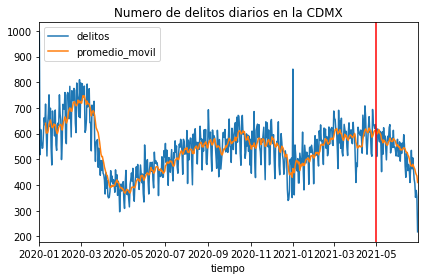

In [975]:
#conteo de delitos por dia desde 2020 y grafico de serie de tiempo
trend = del_cdmx[['fecha_hechos_dt','delitos']][del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2020,1,1)].groupby('fecha_hechos_dt').count()

#generar promedio movil con una ventana de tiempo de 10 dias y graficar
trend['promedio_movil'] = trend.rolling(window=10).mean()
trend.plot()
plt.xlabel("tiempo")
plt.title("Numero de delitos diarios en la CDMX")
plt.axvline(x=pd.Timestamp(2021,5,1),ymin = 0, ymax = 1, color='red')
plt.tight_layout()
plt.show()

Con el objetivo de identificar tendencias actuales para distintos tipos de delitos, se determina considerar datos correspondientes a los últimos dos meses.

Antes de determinar qué tipos de delitos están a la alta y baja, se inspecciona el número total de delitos por tipo, ocurridos desde Mayo 1 hasta Junio 30 de 2021, y también el promedio de delitos diarios por tipo.

In [937]:
pd.DataFrame(del_cdmx['delito'][del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2021,5,1)].value_counts()).head(50)

,delito
VIOLENCIA FAMILIAR,5306
AMENAZAS,2606
FRAUDE,1695
ROBO DE OBJETOS,1528
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1323
ROBO DE ACCESORIOS DE AUTO,1316
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,945
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO),926
NARCOMENUDEO POSESION SIMPLE,636
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,614


In [970]:
df = del_cdmx[['delito','fecha_hechos_dt','delitos']][del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2021,5,1)].groupby(['delito','fecha_hechos_dt']).count().reset_index()[['delito','delitos']].groupby('delito').agg(np.mean)#count()
df[df['delitos'].isin(list(range(0,10)))].shape

(91, 1)

In [973]:
df[df.delitos>10]

,delitos
delito,
AMENAZAS,42.721311
FRAUDE,27.786885
NARCOMENUDEO POSESION SIMPLE,10.426230
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO),15.180328
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,21.688525
ROBO DE ACCESORIOS DE AUTO,21.573770
ROBO DE OBJETOS,25.049180
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,15.491803
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,10.065574


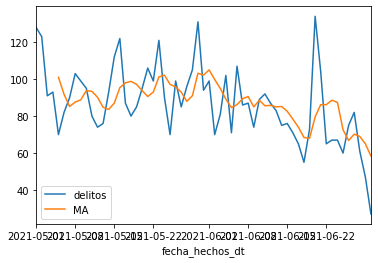

In [908]:

trend = del_cdmx[['fecha_hechos_dt','delitos']][(del_cdmx['fecha_hechos_dt']>=pd.Timestamp(2021,5,1)) & (del_cdmx['delito'] == "VIOLENCIA FAMILIAR")].groupby('fecha_hechos_dt').count()
trend['MA'] = trend.rolling(window=5).mean()
trend.plot()
#plt.xlabel("tiempo")
#plt.title("Delitos diarios en la CDMX")
#plt.tight_layout()
#plt.show()

In [952]:
del_cdmx.fecha_hechos

0          2016-01-31 22:16:00
1          2016-01-31 20:50:00
2          2016-02-01 00:30:00
3          2016-01-31 22:00:00
4          2016-02-01 01:30:00
                  ...         
1207492    2021-06-29 17:00:00
1207493    2021-06-04 19:00:00
1207494    2021-06-30 19:40:00
1207495    2021-05-16 21:08:00
1207496    2021-06-29 17:00:00
Name: fecha_hechos, Length: 1207497, dtype: object

In [957]:
pd.to_datetime( del_cdmx.fecha_hechos[del_cdmx.fecha_hechos_dt >= pd.Timestamp(2021,5,1)] ).dt.week.value_counts()

20    4068
18    4003
19    3956
21    3887
22    3790
23    3684
24    3301
25    3149
17    1128
26     951
Name: fecha_hechos, dtype: int64

IDEAS: correlacion para tendencia: sobre promedio movil

estacionalidad con boxplots y correlogramas o periodogramas y asi